# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Matrix plots in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Setup

In [1]:
from lightning import Lightning

from numpy import random, arange, asarray, corrcoef, argsort, array
import networkx as nx
from sklearn import datasets

## Connect to server


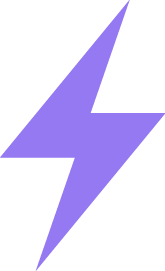

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [2]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

## <hr> Simple matrix

Matrices are useful ways to visualize dense tables and correlation matrices data.
<br>
First we show a random matrix with default styles.
<br>
You can us the arrow keys to change the contrast (up/down) or the colormap (left/right).

In [3]:
mat = random.randn(10,10)
lgn.matrix(mat)

## <hr> Different shapes

Rectanglular matrices will automatically size appropriately.

In [4]:
mat = random.randn(10,20)
lgn.matrix(mat)

In [5]:
mat = random.randn(20,10)
lgn.matrix(mat)

## <hr> Colors

Matrices can be rendered using any colorbrewer colormaps.

In [6]:
mat = random.rand(10,10)
lgn.matrix(mat, colormap='Reds')

In [7]:
mat = random.rand(10,10)
lgn.matrix(mat, colormap='Spectral')

## <hr> Labels

You can label the rows and columns of a matrix. Clicking on the text labels will highlight those rows and columns -- try it!

In [8]:
n, m = (8, 16)
mat = arange(n*m).reshape(n,m)
rows = ['row ' + str(i) for i in range(n)]
columns = ['col ' + str(i) for i in range(m)]

lgn.matrix(mat, row_labels=rows, column_labels=columns)

You can also turn on labeling of cells by their value.

In [9]:
mat = arange(n*m).reshape(n,m)

lgn.matrix(mat, numbers=True)

## <hr> Correlation matrix

Matrices are also commonly used to look at correlation structure.

In [10]:
d, l = datasets.make_blobs(n_features=5, n_samples=25, centers=5, cluster_std=2.0, random_state=100)
d = d[argsort(l)]
c = corrcoef(d)
lgn.matrix(c)

## <hr> Adjacency

Closely realted to correlation matrices are adjacency matrices, in which the rows (and columns) represent nodes and the values indicate connections.
<br>
Lightning offers a separate `adjacency` visualization type. Here is one for a random graph with community structure.

In [11]:
s = [20, 10, 10, 5, 5]
n = sum(s)
G = nx.random_partition_graph(s, 0.5, 0.01)
mat = nx.adjacency_matrix(G).todense()
lgn.adjacency(mat)

If we assign each graph partition a label, we can color and sort nodes by their group.

In [12]:
def group(G, n):
    for i, p in enumerate(G.graph['partition']):
        if n in p:
            return i
g = [group(G, x) for x in range(0,50)]
lgn.adjacency(mat, group=g)

We can alternatively sort by the number of degrees to each node, which here is related to, but not the same as, the group.

In [13]:
def group(G, n):
    for i, p in enumerate(G.graph['partition']):
        if n in p:
            return i
g = [group(G, x) for x in range(0,50)]
lgn.adjacency(mat, group=g, sort='degree')